# Extract and Clean Chicago Census Data

**Instructions:**

1.Provide the file path to the data and the county FIPS codes the second code cell. 

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data

# Allow altair to visualize large datasets
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
# state_fips = '06' # CA FIPS
# county_fips = {'037', '059'}  # 037 Los Angeles County, 059 Orange County
fips = ['17031','17037','17043','17063','17091','17089','17093','17111','17197','17097','18073','18089','18111','18127','55059']

path = '/Volumes/Data_01/census/safegraph_open_census_data/data/cbg_b01.csv'

Load file cbg_b01.csv from the SafeGraph Census data. 

The file contains data about population size and statistics related to race. 




| Column Name  | Description     |
| --------- | ------------------------------------------------------------ |
| B01003e1  | TOTAL POPULATION: Total: Total population  -- (Estimate)     |
| B01003m1  | TOTAL POPULATION: Total: Total population -- (Margin of Error) |
| B02001e1  | RACE: Total: Total population -- (Estimate)                  |
| B02001e10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Estimate) |
| B02001e2  | RACE: White alone: Total population -- (Estimate)            |
| B02001e3  | RACE: Black or African American alone: Total population -- (Estimate) |
| B02001e4  | RACE: American Indian and Alaska Native alone: Total population --  (Estimate) |
| B02001e5  | RACE: Asian alone: Total population -- (Estimate)            |
| B02001e6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Estimate) |
| B02001e7  | RACE: Some other race alone: Total population -- (Estimate)  |
| B02001e8  | RACE: Two or more races: Total population -- (Estimate)      |
| B02001e9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Estimate) |
| B02001m1  | RACE: Total: Total population -- (Margin of Error)           |
| B02001m10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Margin of Error) |
| B02001m2  | RACE: White alone: Total population -- (Margin of Error)     |
| B02001m3  | RACE: Black or African American alone: Total population -- (Margin of  Error) |
| B02001m4  | RACE: American Indian and Alaska Native alone: Total population --  (Margin of Error) |
| B02001m5  | RACE: Asian alone: Total population -- (Margin of Error)     |
| B02001m6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Margin of Error) |
| B02001m7  | RACE: Some other race alone: Total population -- (Margin of Error) |
| B02001m8  | RACE: Two or more races: Total population -- (Margin of Error) |
| B02001m9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Margin of Error) |
| B02008e1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Estimate) |
| B02008m1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Margin of Error) |
| B02009e1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Estimate) |
| B02009m1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Margin of Error) |
| B02010e1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Estimate) |
| B02010m1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Margin of Error) |
| B02011e1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Estimate) |
| B02011m1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Margin of Error) |
| B02012e1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Estimate) |
| B02012m1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Margin of Error) |
| B02013e1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Estimate) |
| B02013m1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Margin of Error) |
| B03002e1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Estimate) |
| B03002e10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Estimate) |
| B03002e11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Estimate) |
| B03002e13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Estimate) |
| B03002e14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Estimate) |
| B03002e15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Estimate) |
| B03002e16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Estimate) |
| B03002e17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Estimate) |
| B03002e19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Estimate) |
| B03002e2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Estimate) |
| B03002e20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Estimate) |
| B03002e21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Estimate) |
| B03002e4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Estimate) |
| B03002e5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Estimate) |
| B03002e6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Estimate) |
| B03002e7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Estimate) |
| B03002e9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Estimate) |
| B03002m1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Margin of  Error) |
| B03002m10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Margin of  Error) |
| B03002m11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Margin of Error) |
| B03002m13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Margin of Error) |
| B03002m14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Margin of Error) |
| B03002m15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Margin of Error) |
| B03002m17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Margin of Error) |
| B03002m18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Margin of Error) |
| B03002m19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Margin of Error) |
| B03002m2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Margin of Error) |
| B03002m20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Margin of Error) |
| B03002m21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Margin of Error) |
| B03002m4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Margin of Error) |
| B03002m5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Margin of Error) |
| B03002m7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Margin of  Error) |
| B03002m8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Margin of Error) |
| B03002m9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Margin of Error) |
| B03003e1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Estimate) |
| B03003e2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Estimate) |
| B03003e3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Estimate) |
| B03003m1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Margin of Error) |
| B03003m2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Margin of Error) |
| B03003m3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Margin of Error) |

Load File with total population for our census block groups.

In [3]:
# Read file
df = pd.read_csv(path, dtype={'census_block_group': object})
df

,census_block_group,B01001e1,B01001m1,B01001e2,B01001m2,B01001e3,B01001m3,B01001e4,B01001m4,B01001e5,...,B01002He3,B01002Hm3,B01002Ie1,B01002Im1,B01002Ie2,B01002Im2,B01002Ie3,B01002Im3,B01003e1,B01003m1
0,010010201001,745,226,356,121,33,32,46,39,4,...,33.6,5.9,NaN,NaN,NaN,NaN,NaN,NaN,745,226
1,010010201002,1265,232,639,139,3,6,6,9,53,...,45.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1265,232
2,010010202001,960,261,534,176,0,11,82,71,90,...,37.2,9.2,NaN,NaN,NaN,NaN,NaN,NaN,960,261
3,010010202002,1236,227,634,136,28,21,47,39,33,...,42.9,2.4,NaN,NaN,NaN,NaN,NaN,NaN,1236,227
4,010010203001,2364,378,1125,229,20,24,166,92,92,...,37.9,9.1,27.2,20.1,27.1,25.7,28.1,15.6,2364,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,460,171,43,65,0,13,0,...,NaN,NaN,57.5,33.1,58.8,10.1,37.3,29.6,921,332
220329,721537506012,2703,531,1353,352,142,112,62,63,62,...,NaN,NaN,34.2,7.7,25.4,12.6,38.6,7.6,2703,531
220330,721537506013,1195,425,583,222,0,13,67,75,103,...,NaN,NaN,25.9,4.0,22.4,6.6,40.5,22.8,1195,425
220331,721537506021,2005,471,926,251,68,49,54,40,107,...,NaN,NaN,46.3,8.1,39.4,15.2,50.3,7.7,2005,471


Extract all census block groups needed.

In [4]:
# Function to filter out FIPS
def filter_fips(df, fips=fips):
    return df[df['census_block_group'].astype(str).str[:5].isin(fips)]

In [5]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,B01001e1,B01001m1,B01001e2,B01001m2,B01001e3,B01001m3,B01001e4,B01001m4,B01001e5,...,B01002He3,B01002Hm3,B01002Ie1,B01002Im1,B01002Ie2,B01002Im2,B01002Ie3,B01002Im3,B01003e1,B01003m1
59955,170310101001,639,232,319,142,0,11,22,38,24,...,57.6,10.3,27.8,46.8,54.3,26.1,19.4,19.2,639,232
59956,170310101002,1768,420,648,193,54,82,67,65,113,...,32.9,6.8,35.1,26.4,33.8,24.0,73.2,93.9,1768,420
59957,170310101003,1981,441,1027,271,29,35,49,60,36,...,30.9,4.9,33.6,4.9,18.9,51.7,33.6,0.3,1981,441
59958,170310102011,1417,299,704,211,54,48,77,73,32,...,40.1,13.2,34.0,30.2,55.2,42.9,NaN,NaN,1417,299
59959,170310102012,4641,770,2418,464,204,113,146,93,116,...,33.7,5.5,33.4,7.4,33.9,5.2,29.3,14.2,4641,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214289,550590030014,815,136,460,88,5,8,5,9,34,...,55.2,7.4,15.9,50.4,NaN,NaN,15.4,0.8,815,136
214290,550590030021,1699,271,918,190,106,71,38,29,73,...,36.9,6.6,4.9,88.8,NaN,NaN,NaN,NaN,1699,271
214291,550590030022,1798,233,837,127,29,27,58,29,27,...,45.4,3.1,11.0,48.3,NaN,NaN,16.5,55.8,1798,233
214292,550590030023,1503,309,762,180,32,26,59,34,68,...,39.3,5.0,25.1,6.7,22.0,6.3,NaN,NaN,1503,309


In [6]:
'We have {} Census Block Groups'.format(len(df.index))

'We have 6674 Census Block Groups'

Extract the total population for each census block group, which is under column B01003e1.

In [7]:
# Select column
df = df[['census_block_group','B01003e1']]
df = df.rename(columns={'census_block_group':'cbg', 'B01003e1':'pop_total'})
df = df.set_index('cbg')
df = df
df

,pop_total
cbg,
170310101001,639
170310101002,1768
170310101003,1981
170310102011,1417
170310102012,4641
...,...
550590030014,815
550590030021,1699
550590030022,1798


In [8]:
df.max(), df.min()

(pop_total    17660
 dtype: int64,
 pop_total    0
 dtype: int64)

In [9]:
alt.Chart(df, title='Chicago CBG Population Histogram').mark_bar().encode(
    x=alt.X('pop_total:Q', bin=alt.Bin(maxbins=20), title='Total CBG Population'),
    y="count()"
).interactive()

alt.Chart(...)

![ch-pop-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/ch-pop-hist.png)

Load the file with the race stats

In [10]:
# Read file
df = pd.read_csv('/Volumes/Data_01/census/safegraph_open_census_data/data/cbg_b02.csv', dtype={'census_block_group': object})
df

,census_block_group,B02001e1,B02001m1,B02001e2,B02001m2,B02001e3,B02001m3,B02001e4,B02001m4,B02001e5,...,C02003e15,C02003m15,C02003e16,C02003m16,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19
0,010010201001,745,226,585,198,160,140,0,11,0,...,0,11,0,11,0,11,0,11,0,11
1,010010201002,1265,232,1083,222,104,75,0,11,9,...,8,14,0,11,21,33,0,11,0,11
2,010010202001,960,261,361,179,568,195,0,11,0,...,18,30,0,11,0,11,0,11,0,11
3,010010202002,1236,227,615,154,571,168,0,11,24,...,0,11,0,11,0,11,0,11,0,11
4,010010203001,2364,378,1481,314,515,197,22,34,27,...,5,10,0,11,56,95,0,11,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,752,348,0,13,0,13,0,...,0,13,0,13,0,13,0,13,0,13
220329,721537506012,2703,531,2230,459,207,175,40,63,0,...,0,13,0,13,26,39,0,13,0,13
220330,721537506013,1195,425,1085,429,25,31,0,13,0,...,0,13,0,13,0,13,0,13,0,13
220331,721537506021,2005,471,1662,463,68,64,0,13,0,...,0,13,0,13,0,13,0,13,0,13


In [11]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,B02001e1,B02001m1,B02001e2,B02001m2,B02001e3,B02001m3,B02001e4,B02001m4,B02001e5,...,C02003e15,C02003m15,C02003e16,C02003m16,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19
59955,170310101001,639,232,288,172,232,137,0,11,0,...,0,11,0,11,96,117,0,11,0,11
59956,170310101002,1768,420,676,232,1009,363,0,11,13,...,0,11,0,11,0,11,0,11,0,11
59957,170310101003,1981,441,1252,341,475,227,0,11,153,...,28,46,15,23,0,11,8,18,0,11
59958,170310102011,1417,299,588,212,656,244,20,32,100,...,13,27,0,11,23,37,0,11,0,11
59959,170310102012,4641,770,1962,460,2319,740,0,11,82,...,59,66,13,21,14,25,0,11,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214289,550590030014,815,136,797,145,2,4,16,24,0,...,0,9,0,9,0,9,0,9,0,9
214290,550590030021,1699,271,1627,263,23,31,0,9,26,...,0,9,0,9,7,11,16,27,0,9
214291,550590030022,1798,233,1743,223,10,21,0,9,19,...,0,9,0,9,14,12,0,9,0,9
214292,550590030023,1503,309,1470,304,9,11,0,9,0,...,0,9,0,9,5,8,0,9,0,9


In [12]:
# Get white only population
df = df[['census_block_group','B02001e1','B02001e2']]
df = df.rename(columns={'census_block_group':'cbg','B02001e1':'pop_total','B02001e2':'pop_whiteonly' })
df = df.set_index('cbg')
df

,pop_total,pop_whiteonly
cbg,,
170310101001,639,288
170310101002,1768,676
170310101003,1981,1252
170310102011,1417,588
170310102012,4641,1962
...,...,...
550590030014,815,797
550590030021,1699,1627
550590030022,1798,1743


In [13]:
# Calculate percentage
df['perc_whiteonly']= df.apply(lambda row: row['pop_whiteonly']/row['pop_total']*100 if row['pop_total']!=0 else 0, axis=1)
df

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
170310101001,639,288,45.070423
170310101002,1768,676,38.235294
170310101003,1981,1252,63.200404
170310102011,1417,588,41.496119
170310102012,4641,1962,42.275372
...,...,...,...
550590030014,815,797,97.791411
550590030021,1699,1627,95.762213
550590030022,1798,1743,96.941046


In [14]:
# Get top 3 CBG with highest whiteonly percentage
df.nlargest(3, 'perc_whiteonly')

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
170310810001,368,368,100.0
170310902001,884,884,100.0
170311001002,1626,1626,100.0


In [15]:
# Get top 3 CBG with lowest whiteonly percentage
df.nsmallest(3, 'perc_whiteonly')

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
170310608002,0,0,0.0
170310609002,0,0,0.0
170310619024,0,0,0.0


In [16]:
# unique variable for join later
race_df = df 
race_df

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
170310101001,639,288,45.070423
170310101002,1768,676,38.235294
170310101003,1981,1252,63.200404
170310102011,1417,588,41.496119
170310102012,4641,1962,42.275372
...,...,...,...
550590030014,815,797,97.791411
550590030021,1699,1627,95.762213
550590030022,1798,1743,96.941046


In [17]:
alt.Chart(race_df, title='Chicago CBG Percentage White Only Histogram').mark_bar().encode(
    x=alt.X('perc_whiteonly:Q', bin=alt.Bin(maxbins=20), title='CBG Percentage White Only'),
    y="count()"
).interactive()

alt.Chart(...)

![ch-wh-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/ch-wh-hist.png)

# Get Poverty Stats


| Column Name | Description |
| -------- | ------------------------------------------------------------ |
| C17002e1 | RATIO OF INCOME TO POVERTY LEVEL IN THE  PAST 12 MONTHS: Total: Population for whom poverty status is determined --  (Estimate) |
| C17002e2 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: Under .50:  Population for whom poverty status is determined -- (Estimate) |
| C17002e3 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: .50 to .99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e4 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.00 to 1.24:  Population for whom poverty status is determined -- (Estimate) |
| C17002e5 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.25 to 1.49:  Population for whom poverty status is determined -- (Estimate) |
| C17002e6 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.50 to 1.84:  Population for whom poverty status is determined -- (Estimate) |
| C17002e7 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.85 to 1.99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e8 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 2.00 and over:  Population for whom poverty status is determined -- (Estimate) |






In [19]:
# Read file 
df = pd.read_csv('/Volumes/Data_01/census/safegraph_open_census_data/data/cbg_c17.csv', dtype={'census_block_group': object})
df

,census_block_group,C17002e1,C17002m1,C17002e2,C17002m2,C17002e3,C17002m3,C17002e4,C17002m4,C17002e5,...,B17021e31,B17021m31,B17021e32,B17021m32,B17021e33,B17021m33,B17021e34,B17021m34,B17021e35,B17021m35
0,010010201001,745,226,47,58,96,93,49,36,76,...,88,42,66,37,56,35,10,12,22,27
1,010010201002,1265,232,8,10,48,76,31,50,29,...,64,36,58,32,50,30,8,11,6,9
2,010010202001,955,259,122,155,243,118,20,19,16,...,72,38,62,33,62,33,0,11,10,14
3,010010202002,1059,214,53,47,65,68,61,50,87,...,145,51,138,50,132,51,6,9,7,10
4,010010203001,2364,378,23,32,77,75,74,86,117,...,268,99,249,90,213,88,36,35,19,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,462,279,160,119,85,107,35,...,74,58,74,58,74,58,0,13,0,13
220329,721537506012,2703,531,648,332,530,292,122,161,95,...,66,50,66,50,66,50,0,13,0,13
220330,721537506013,1195,425,15,26,277,254,48,76,90,...,19,21,19,21,19,21,0,13,0,13
220331,721537506021,1990,466,862,397,583,248,99,115,136,...,30,28,30,28,30,28,0,13,0,13


In [20]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,C17002e1,C17002m1,C17002e2,C17002m2,C17002e3,C17002m3,C17002e4,C17002m4,C17002e5,...,B17021e31,B17021m31,B17021e32,B17021m32,B17021e33,B17021m33,B17021e34,B17021m34,B17021e35,B17021m35
59955,170310101001,639,232,24,40,150,114,39,62,0,...,110,83,110,83,110,83,0,11,0,11
59956,170310101002,1751,419,694,470,189,141,33,54,154,...,319,166,252,117,203,106,49,57,67,79
59957,170310101003,1881,436,93,59,362,304,26,30,56,...,755,237,577,158,438,140,139,98,178,122
59958,170310102011,1417,299,258,173,299,158,64,77,21,...,292,148,215,103,146,84,69,55,77,61
59959,170310102012,4628,769,669,520,838,398,294,227,340,...,585,192,503,163,381,142,122,81,82,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214289,550590030014,809,136,16,17,77,54,0,9,102,...,77,54,43,32,33,29,10,13,34,37
214290,550590030021,1699,271,95,98,8,13,42,65,66,...,348,143,230,77,130,55,100,64,118,78
214291,550590030022,1798,233,55,50,169,125,91,85,33,...,180,85,129,57,94,53,35,30,51,45
214292,550590030023,1503,309,61,67,101,134,70,47,78,...,200,63,190,61,161,52,29,35,10,23


In [21]:
# Select columns
df = df[['census_block_group', 'C17002e1', 'C17002e2', 'C17002e3']]
df = df.rename(columns={'census_block_group':'cbg', 'C17002e1':'pov_pop_all'})
df = df.set_index('cbg')
df

,pov_pop_all,C17002e2,C17002e3
cbg,,,
170310101001,639,24,150
170310101002,1751,694,189
170310101003,1881,93,362
170310102011,1417,258,299
170310102012,4628,669,838
...,...,...,...
550590030014,809,16,77
550590030021,1699,95,8
550590030022,1798,55,169


In [22]:
# Add row values together
df['pop_poverty'] = df.apply(lambda row: row['C17002e2']+row['C17002e3'], axis=1)
df

,pov_pop_all,C17002e2,C17002e3,pop_poverty
cbg,,,,
170310101001,639,24,150,174
170310101002,1751,694,189,883
170310101003,1881,93,362,455
170310102011,1417,258,299,557
170310102012,4628,669,838,1507
...,...,...,...,...
550590030014,809,16,77,93
550590030021,1699,95,8,103
550590030022,1798,55,169,224


In [23]:
# Calculate percentage
df['poverty_percentage'] = df.apply(lambda row: row['pop_poverty']/row['pov_pop_all']*100 if row['pov_pop_all'] != 0 else 0, axis=1)
df

,pov_pop_all,C17002e2,C17002e3,pop_poverty,poverty_percentage
cbg,,,,,
170310101001,639,24,150,174,27.230047
170310101002,1751,694,189,883,50.428327
170310101003,1881,93,362,455,24.189261
170310102011,1417,258,299,557,39.308398
170310102012,4628,669,838,1507,32.562662
...,...,...,...,...,...
550590030014,809,16,77,93,11.495674
550590030021,1699,95,8,103,6.062390
550590030022,1798,55,169,224,12.458287


In [24]:
# Select Column
df = df[['pop_poverty','poverty_percentage']]
df

,pop_poverty,poverty_percentage
cbg,,
170310101001,174,27.230047
170310101002,883,50.428327
170310101003,455,24.189261
170310102011,557,39.308398
170310102012,1507,32.562662
...,...,...
550590030014,93,11.495674
550590030021,103,6.062390
550590030022,224,12.458287


In [25]:
# Preview largest
df.nlargest(3, 'poverty_percentage')

,pop_poverty,poverty_percentage
cbg,,
170315401014,283,92.786885
170898503011,1555,89.419206
180890412003,372,84.353741


In [26]:
# Preview smallest
df.nsmallest(3, 'poverty_percentage')

,pop_poverty,poverty_percentage
cbg,,
170310202001,0,0.0
170310309004,0,0.0
170310311003,0,0.0


In [27]:
pov_df = df

In [29]:
alt.Chart(pov_df, title='Chicago CBG Percentage of Population in Poverty Histogram').mark_bar().encode(
    x=alt.X('poverty_percentage:Q', bin=alt.Bin(maxbins=20), title='CBG Percentage of Population in Poverity'),
    y="count()"
).interactive()

alt.Chart(...)

![ch-pov-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/ch-pov-hist.png)

In [ ]:
# Read geojson for ALL US
# WARNING TAKES A LONG TIME
gdf = geopandas.read_file(
        '/Users/justinsnider/nyu-big-data/project/data/census/safegraph_open_census_data/geometry/cbg.geojson')
gdf

In [25]:
gdf[gdf['CensusBlockGroup'].astype(str).str[:5].isin(fips)]

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
59466,17,031,290900,1,170312909001,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ..."
59472,17,031,290900,2,170312909002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ..."
59473,17,031,290900,3,170312909003,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ..."
59474,17,031,290900,4,170312909004,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ..."
59475,17,031,838700,2,170318387002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ..."
...,...,...,...,...,...,...,...,...,...
217135,55,059,003002,3,550590030023,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ..."
217136,55,059,000500,4,550590005004,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ..."
217137,55,059,000602,4,550590006024,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ..."
217138,55,059,000601,5,550590006015,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.89562 42.66896, -87.89489 ..."


In [26]:
# Filter by FIPS
gdf = gdf[gdf['CensusBlockGroup'].astype(str).str[:5].isin(fips)]
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
59466,17,031,290900,1,170312909001,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ..."
59472,17,031,290900,2,170312909002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ..."
59473,17,031,290900,3,170312909003,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ..."
59474,17,031,290900,4,170312909004,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ..."
59475,17,031,838700,2,170318387002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ..."
...,...,...,...,...,...,...,...,...,...
217135,55,059,003002,3,550590030023,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ..."
217136,55,059,000500,4,550590005004,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ..."
217137,55,059,000602,4,550590006024,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ..."
217138,55,059,000601,5,550590006015,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.89562 42.66896, -87.89489 ..."


In [29]:
# Write filtered geojson file to disc
gdf.to_file('/Users/justinsnider/nyu-big-data/project/clean-data/ch/ch.geojson', driver='GeoJSON')

In [32]:
# Read geojson file
gdf = geopandas.read_file(
        '/Users/justinsnider/nyu-big-data/project/clean-data/ch/ch.geojson')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,17,031,290900,1,170312909001,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ..."
1,17,031,290900,2,170312909002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ..."
2,17,031,290900,3,170312909003,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ..."
3,17,031,290900,4,170312909004,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ..."
4,17,031,838700,2,170318387002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ..."
...,...,...,...,...,...,...,...,...,...
6669,55,059,003002,3,550590030023,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ..."
6670,55,059,000500,4,550590005004,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ..."
6671,55,059,000602,4,550590006024,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ..."
6672,55,059,000601,5,550590006015,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.89562 42.66896, -87.89489 ..."


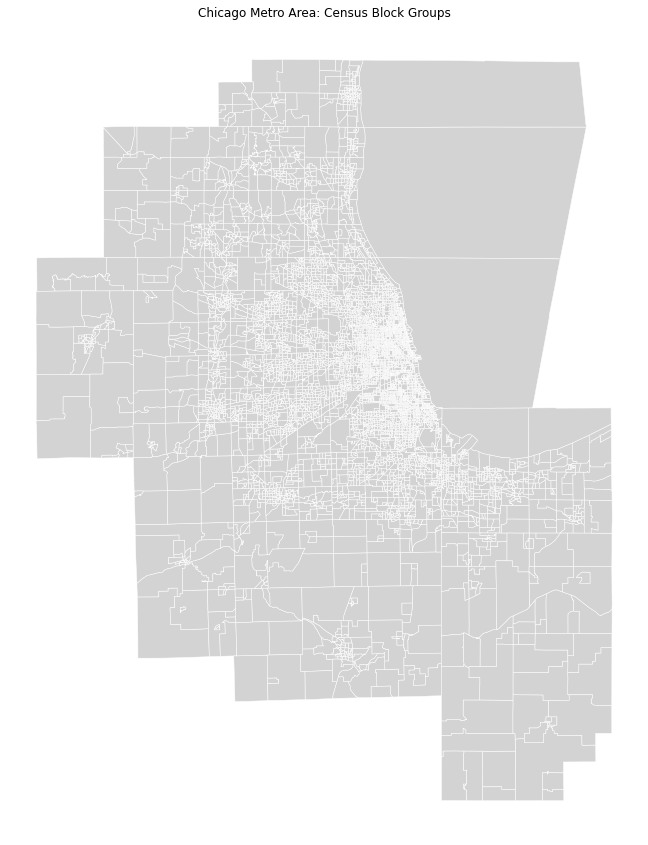

In [33]:
# Preview map
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: Census Block Groups')
ax.axis('off')
gdf.plot(ax=ax, facecolor="lightgray", edgecolor="white", lw=0.5);

In [34]:
# simplify column name
gdf = gdf.rename(columns={'CensusBlockGroup':'cbg'})
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,cbg,State,County,ClassCode,geometry
0,17,031,290900,1,170312909001,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ..."
1,17,031,290900,2,170312909002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ..."
2,17,031,290900,3,170312909003,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ..."
3,17,031,290900,4,170312909004,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ..."
4,17,031,838700,2,170318387002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ..."
...,...,...,...,...,...,...,...,...,...
6669,55,059,003002,3,550590030023,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ..."
6670,55,059,000500,4,550590005004,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ..."
6671,55,059,000602,4,550590006024,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ..."
6672,55,059,000601,5,550590006015,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.89562 42.66896, -87.89489 ..."


In [35]:
# Load cbg_geographic_data
# Format table for join
# Join geometry with table
# Calculate population per square meter land
# Visualize population density

In [36]:
# Verify column datatype
gdf['cbg'].dtype

dtype('O')

In [37]:
# # Change column datatype
# gdf = gdf.astype({'cbg':'int64'})
# gdf

In [38]:
# # Verify datatype of column
# gdf['cbg'].dtype

In [39]:
# set index for join
gdf = gdf.set_index('cbg')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry
cbg,,,,,,,,
170312909001,17,031,290900,1,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ..."
170312909002,17,031,290900,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ..."
170312909003,17,031,290900,3,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ..."
170312909004,17,031,290900,4,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ..."
170318387002,17,031,838700,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ..."
...,...,...,...,...,...,...,...,...
550590030023,55,059,003002,3,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ..."
550590005004,55,059,000500,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ..."
550590006024,55,059,000602,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ..."


In [40]:
gdf = gdf.merge(race_df, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,,,,,,,,,
170312909001,17,031,290900,1,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ...",935,0,0.000000
170312909002,17,031,290900,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ...",1129,0,0.000000
170312909003,17,031,290900,3,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ...",765,0,0.000000
170312909004,17,031,290900,4,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ...",1075,0,0.000000
170318387002,17,031,838700,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ...",1016,137,13.484252
...,...,...,...,...,...,...,...,...,...,...,...
550590030023,55,059,003002,3,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ...",1503,1470,97.804391
550590005004,55,059,000500,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ...",2013,1740,86.438152
550590006024,55,059,000602,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ...",1636,1361,83.190709


In [41]:
gdf = gdf.merge(pov_df, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,pop_whiteonly,perc_whiteonly,pop_poverty,poverty_percentage
cbg,,,,,,,,,,,,,
170312909001,17,031,290900,1,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ...",935,0,0.000000,522,55.828877
170312909002,17,031,290900,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ...",1129,0,0.000000,511,45.261293
170312909003,17,031,290900,3,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ...",765,0,0.000000,299,39.707835
170312909004,17,031,290900,4,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ...",1075,0,0.000000,326,30.325581
170318387002,17,031,838700,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ...",1016,137,13.484252,315,31.003937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550590030023,55,059,003002,3,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ...",1503,1470,97.804391,162,10.778443
550590005004,55,059,000500,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ...",2013,1740,86.438152,374,18.579235
550590006024,55,059,000602,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ...",1636,1361,83.190709,299,18.276284


In [42]:
# Write filtered geojson file to disc
gdf.to_file('/Users/justinsnider/nyu-big-data/project/clean-data/ch/ch_census.geojson', driver='GeoJSON')

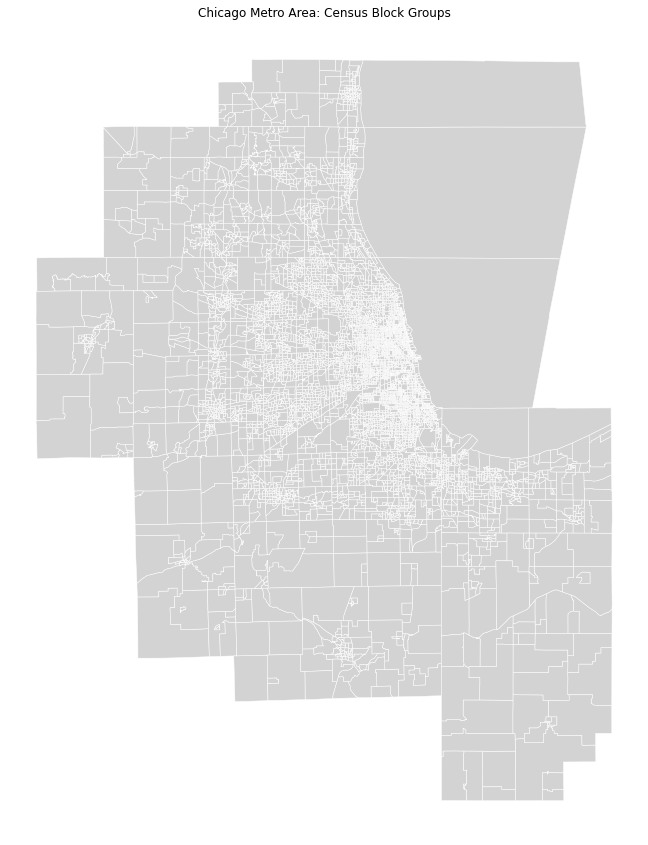

In [43]:
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: Census Block Groups')
ax.axis('off')
gdf.plot(ax=ax, facecolor="lightgray", edgecolor="white", lw=0.5);

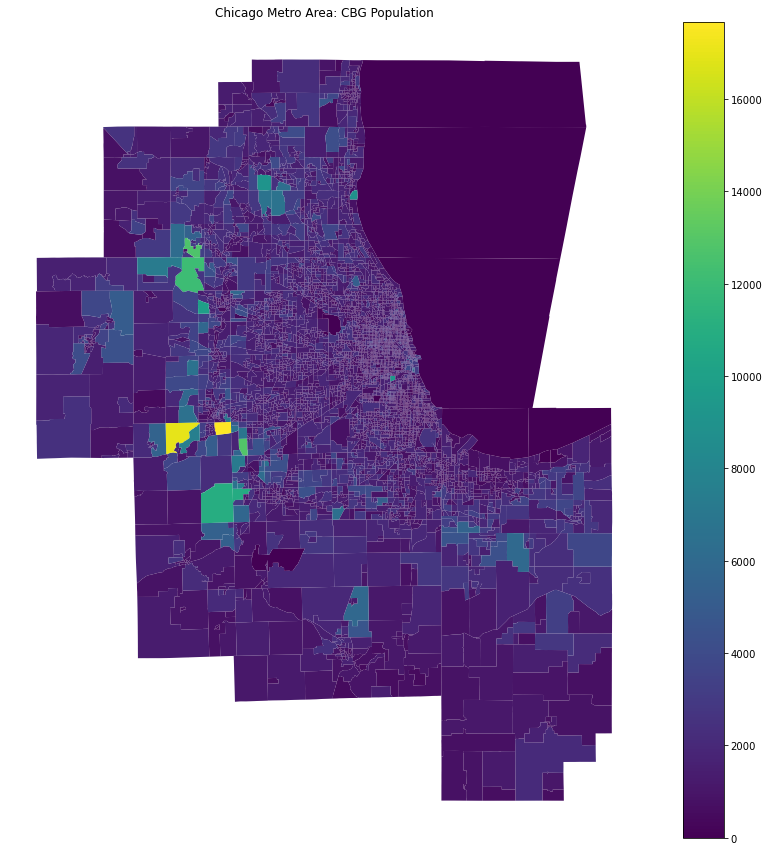

In [44]:
# Plot population size
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Population')
ax.axis('off')
gdf.plot(column='pop_total', ax=ax, legend=True);

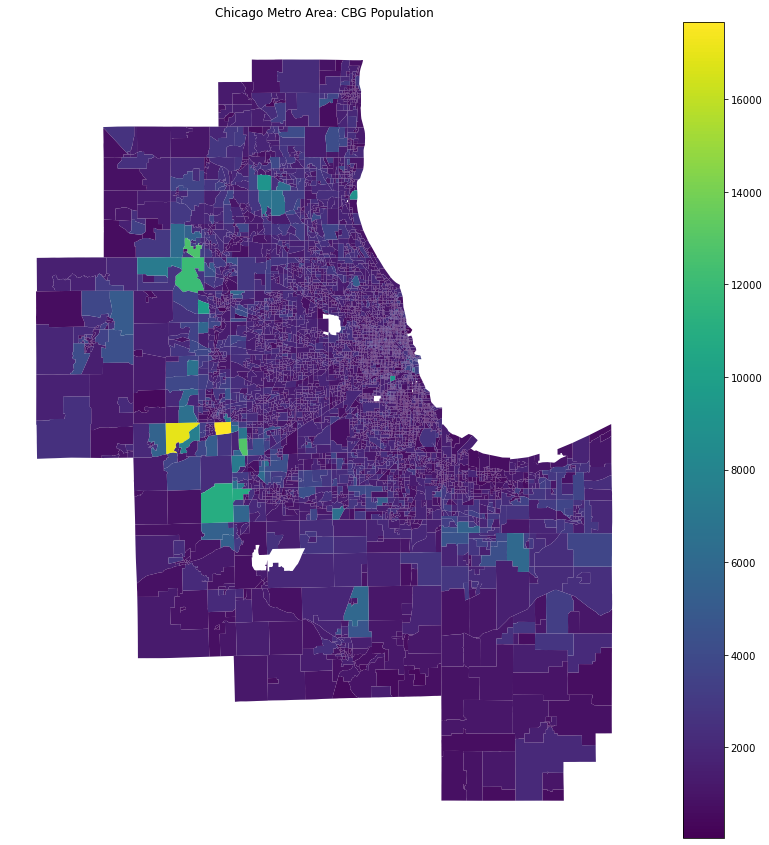

In [45]:
# Pop where not 0
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Population')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='pop_total', ax=ax, legend=True);

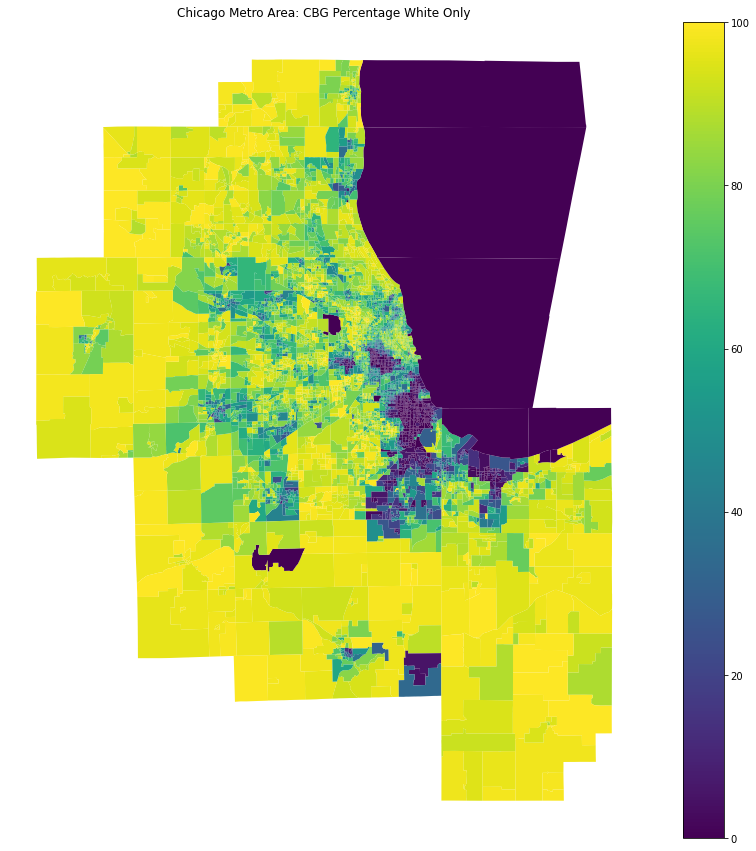

In [46]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Percentage White Only')
ax.axis('off')
gdf.plot(column='perc_whiteonly', ax=ax, legend=True);

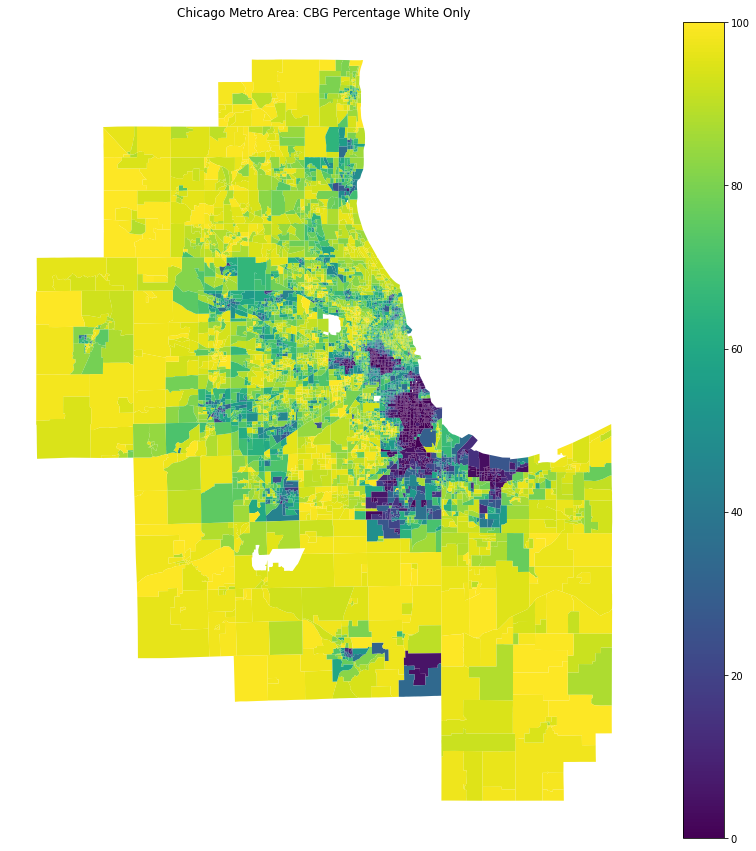

In [47]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Percentage White Only')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='perc_whiteonly', ax=ax, legend=True);

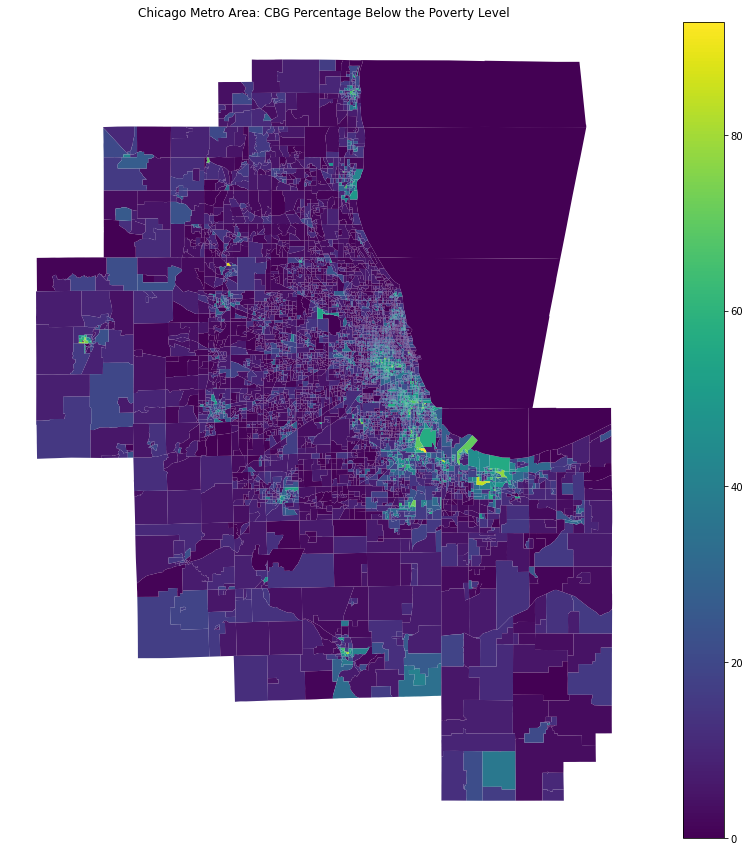

In [48]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Percentage Below the Poverty Level')
ax.axis('off')
gdf.plot(column='poverty_percentage', ax=ax, legend=True);

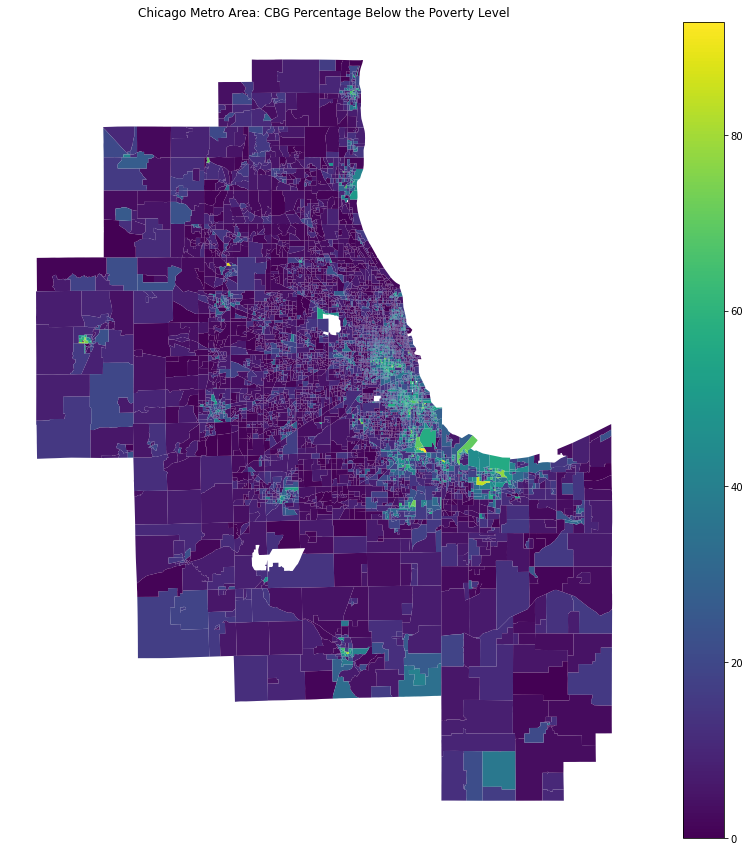

In [49]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Percentage Below the Poverty Level')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='poverty_percentage', ax=ax, legend=True);

In [50]:
# Extract stats to save
stats_df = gdf[['pop_total','poverty_percentage','perc_whiteonly']]
stats_df

,pop_total,poverty_percentage,perc_whiteonly
cbg,,,
170312909001,935,55.828877,0.000000
170312909002,1129,45.261293,0.000000
170312909003,765,39.707835,0.000000
170312909004,1075,30.325581,0.000000
170318387002,1016,31.003937,13.484252
...,...,...,...
550590030023,1503,10.778443,97.804391
550590005004,2013,18.579235,86.438152
550590006024,1636,18.276284,83.190709


In [56]:
if len(set(stats_df.index)) == len(stats_df.index):
    print('Everything is good, every Row has a unique CBG!')
else:
    print('We have a problem, not every row uas a unique CBG.')

Everything is good, every Row has a unique CBG!


In [57]:
for col in stats_df.columns:
    print('\n')
    print(col)
    print('Min: {}\nMax: {}'.format(stats_df[col].min(), stats_df[col].max()))



pop_total
Min: 0
Max: 17660


poverty_percentage
Min: 0.0
Max: 92.78688524590164


perc_whiteonly
Min: 0.0
Max: 100.0


In [58]:
# Print all Null and NaN values
print('We have {} null values.'.format(len(stats_df[stats_df.isna().any(axis=1)])))

We have 0 null values.


In [48]:
# Write stats to disc
filename = '/Users/justinsnider/nyu-big-data/project/clean-data/ch/ch.csv'
stats_df.to_csv(filename)